### Load Modules

In [2]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 652.6 kB/s eta 0:00:00m eta 0:00:010:00:03


Logistic Regression Training Score: 0.9991289198606271
Logistic Regression Testing Score: 0.818815331010453
SVM Training Score: 0.9351045296167247
SVM Testing Score: 0.818815331010453
Total Misclassified Samples:  104
Predicted: 3 Actual: 3


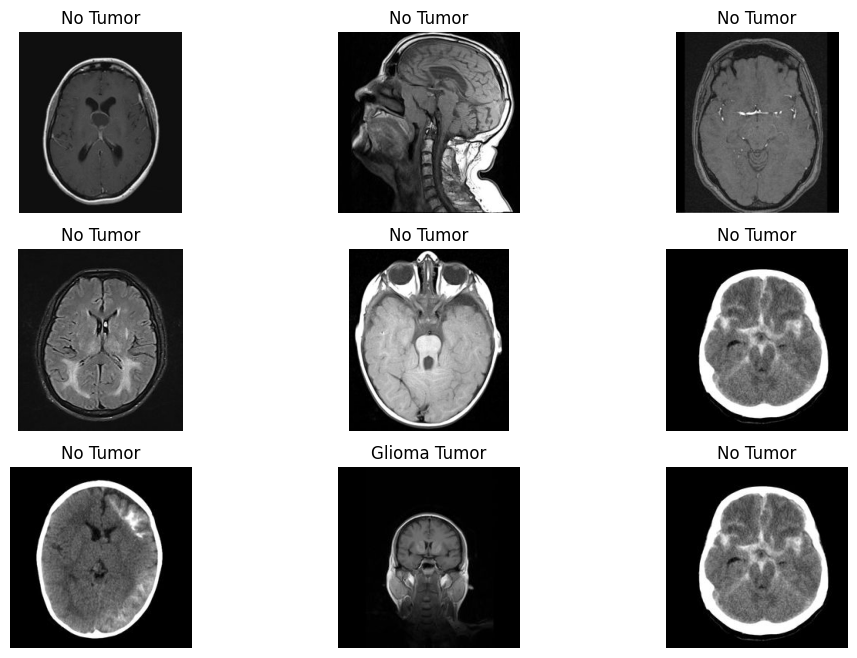

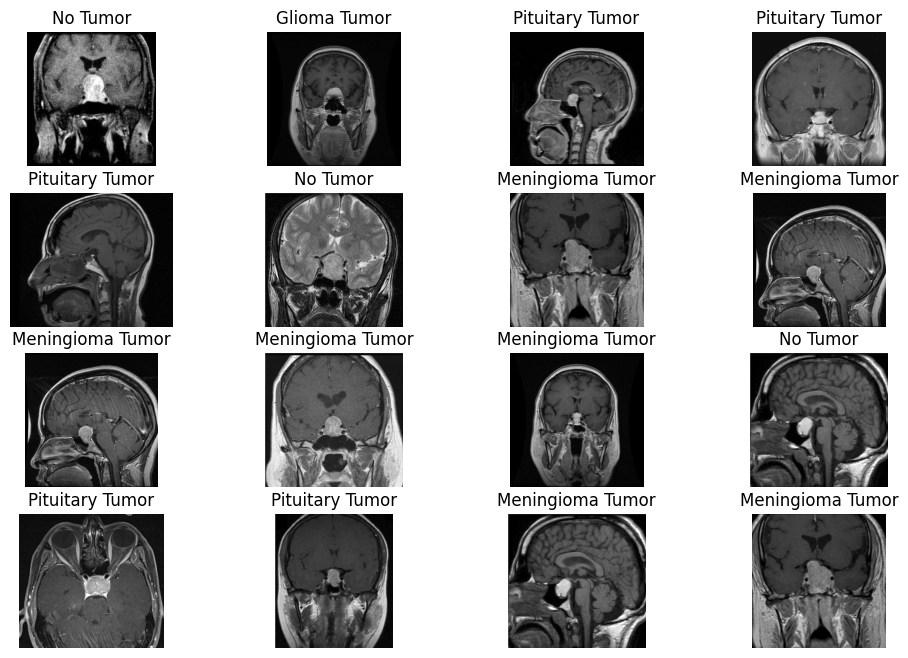

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')

# Define the path to the dataset and the classes
path = os.listdir('Training/')
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor': 3}

# Initialize empty lists to hold the image data and labels
X = []
Y = []

# Loop through each class and read in the images
for cls in classes:
    pth = 'Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)  # Read image in grayscale
        img = cv2.resize(img, (200, 200))  # Resize image to 200x200
        X.append(img)  # Append image to the list
        Y.append(classes[cls])  # Append class label to the list

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Reshape the image data to 1D vectors
X_updated = X.reshape(len(X), -1)

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

# Normalize the image data
xtrain = xtrain / 255
xtest = xtest / 255

# Initialize and train the Logistic Regression model
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

# Initialize and train the Support Vector Classifier model
sv = SVC()
sv.fit(xtrain, ytrain)

# Print training and testing scores for both models
print("Logistic Regression Training Score:", lg.score(xtrain, ytrain))
print("Logistic Regression Testing Score:", lg.score(xtest, ytest))

print("SVM Training Score:", sv.score(xtrain, ytrain))
print("SVM Testing Score:", sv.score(xtest, ytest))

# Predict the labels for the test set using the SVM model
pred = sv.predict(xtest)

# Find misclassified samples
misclassified = np.where(ytest != pred)
print("Total Misclassified Samples: ", len(misclassified[0]))

# Print a sample prediction
print("Predicted:", pred[36], "Actual:", ytest[36])

# Create a dictionary to decode the class labels
dec = {0: 'No Tumor', 1: 'Pituitary Tumor', 2: 'Glioma Tumor', 3: 'Meningioma Tumor'}

# Visualize predictions on test images for 'no_tumor' class
plt.figure(figsize=(12, 8))
for c, i in enumerate(os.listdir('Testing/no_tumor/')[:9], 1):
    plt.subplot(3, 3, c)
    img = cv2.imread('Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Visualize predictions on test images for 'pituitary_tumor' class
plt.figure(figsize=(12, 8))
for c, i in enumerate(os.listdir('Testing/pituitary_tumor/')[:16], 1):
    plt.subplot(4, 4, c)
    img = cv2.imread('Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')


In [4]:
import joblib
# Save the models to disk using joblib
joblib.dump(lg, 'logistic_regression_model.joblib')
joblib.dump(sv, 'svm_model.joblib')

print("Models saved to disk.")


Models saved to disk.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the trained models
lg = joblib.load('logistic_regression_model.joblib')
sv = joblib.load('svm_model.joblib')

# Predict the labels for the test set
lg_pred = lg.predict(xtest)
sv_pred = sv.predict(xtest)

# Calculate metrics for Logistic Regression
lg_accuracy = accuracy_score(ytest, lg_pred)
lg_precision = precision_score(ytest, lg_pred, average='weighted')
lg_recall = recall_score(ytest, lg_pred, average='weighted')
lg_f1 = f1_score(ytest, lg_pred, average='weighted')
lg_classification_report = classification_report(ytest, lg_pred, target_names=['No Tumor', 'Pituitary Tumor', 'Glioma Tumor', 'Meningioma Tumor'])
lg_confusion_matrix = confusion_matrix(ytest, lg_pred)

# Calculate metrics for SVM
sv_accuracy = accuracy_score(ytest, sv_pred)
sv_precision = precision_score(ytest, sv_pred, average='weighted')
sv_recall = recall_score(ytest, sv_pred, average='weighted')
sv_f1 = f1_score(ytest, sv_pred, average='weighted')
sv_classification_report = classification_report(ytest, sv_pred, target_names=['No Tumor', 'Pituitary Tumor', 'Glioma Tumor', 'Meningioma Tumor'])
sv_confusion_matrix = confusion_matrix(ytest, sv_pred)

# Write the performance report to a README.md file
with open('README.md', 'w') as f:
    f.write("# Model Performance Report\n")
    f.write("## Logistic Regression Model\n")
    f.write(f"**Training Score:** {lg.score(xtrain, ytrain):.4f}\n")
    f.write(f"**Testing Score:** {lg_accuracy:.4f}\n")
    f.write(f"**Precision:** {lg_precision:.4f}\n")
    f.write(f"**Recall:** {lg_recall:.4f}\n")
    f.write(f"**F1 Score:** {lg_f1:.4f}\n")
    f.write("\n### Classification Report:\n")
    f.write(lg_classification_report)
    f.write("\n### Confusion Matrix:\n")
    f.write(np.array2string(lg_confusion_matrix, separator=', '))
    f.write("\n\n")
    
    f.write("## Support Vector Machine (SVM) Model\n")
    f.write(f"**Training Score:** {sv.score(xtrain, ytrain):.4f}\n")
    f.write(f"**Testing Score:** {sv_accuracy:.4f}\n")
    f.write(f"**Precision:** {sv_precision:.4f}\n")
    f.write(f"**Recall:** {sv_recall:.4f}\n")
    f.write(f"**F1 Score:** {sv_f1:.4f}\n")
    f.write("\n### Classification Report:\n")
    f.write(sv_classification_report)
    f.write("\n### Confusion Matrix:\n")
    f.write(np.array2string(sv_confusion_matrix, separator=', '))
    
print("Performance report saved to README.md")


In [1]:
import joblib

# Load the trained models
lg = joblib.load('logistic_regression_model.joblib')
sv = joblib.load('svm_model.joblib')

# Save the models as .sav files
joblib.dump(lg, 'logistic_regression_model.sav')
joblib.dump(sv, 'svm_model.sav')

print("Models saved as .sav files.")


Models saved as .sav files.
